In [45]:
import pandas as pd 
import numpy as np

df = pd.read_csv('customer_churn.csv')

print(f"Dataset Shape: {df.shape}")

display(df)

print("\n--- Column Data Types ---")
print(df.dtypes)

print("\n--- Missing Values ---")
print(df.isnull().sum())

print(f"\nDuplicate rows: {df.duplicated().sum()}")


Dataset Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes



--- Column Data Types ---
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

--- Missing Values ---
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract         

In [46]:
# Converting churn into binary numeric format
# 1 = Churned, 0 = Retained
df["Churn"] = df["Churn"].map({"Yes": 1, "No":0})

# Defining Target (y)
y = df["Churn"]

# Defing Features (x)
x = df.drop(columns = ["Churn", "customerID"])

print("Variable Definitions Complete:")
print(f"Target (y) shape: {y.shape}")
print(f"Features (x) shape: {x.shape}")

Variable Definitions Complete:
Target (y) shape: (7043,)
Features (x) shape: (7043, 19)


In [47]:
# Converting TotalCharges to be numeric. 
# 'errors = coerce' turns empty spaces into NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

# Filling the new NaN value with 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Define our Features (x) again with the cleaned data
x = df.drop(columns=['Churn', 'customerID'])

#Converting String to Binary Representation of 0 and 1
x = pd.get_dummies(x, drop_first=True)

# Converting True/False into 1/0
x = x.astype(int)

print(f"Final shape of Feature Matrix x: {x.shape}")
print(f"Are there any missing values left? {x.isnull().any().any()}")

display(x.head())

Final shape of Feature Matrix x: (7043, 30)
Are there any missing values left? False


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29,29,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56,1889,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53,108,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42,1840,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70,151,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [48]:
from sklearn.model_selection import train_test_split

# Split 1: Splitting x and y dataset into 70% Traning and 30% Temporary
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.30, random_state=5, stratify=y)

#Split 2: Splitting 30% Temporary Dataset into 15% Validation and 15% Testing 
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.50, random_state=5, stratify=y_temp)

print(f"Training: {len(x_train)} | Validation: {len(x_val)} | Test: {len(x_test)}")

Training: 4930 | Validation: 1056 | Test: 1057


In [49]:
from sklearn.linear_model import LogisticRegression

# Initializing the model with default parameters
model = LogisticRegression(max_iter=1000)

# Training the model on the Training Dataset
model.fit(x_train, y_train)

# Generate predictions for the Validation Dataset
val_predictions = model.predict(x_val)

# Generate predictions for the Test Dataset
test_predictions = model.predict(x_test)

print("Model training Complete!")
print("Predictions have been generated for both Validation and Test sets.")

Model training Complete!
Predictions have been generated for both Validation and Test sets.


Validation Accuracy:  80.68%
Test Accuracy:  78.43%


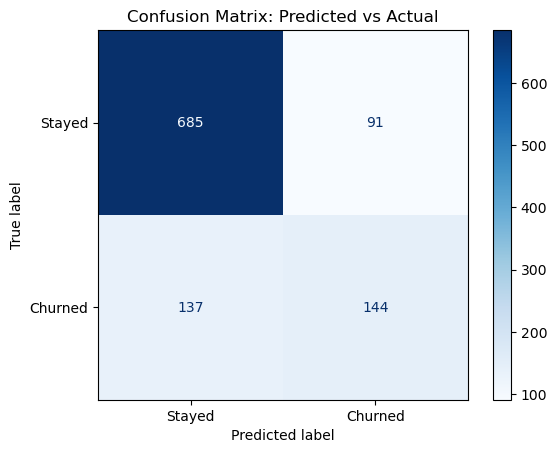

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculating Accuracy
val_accuracy = accuracy_score(y_val, val_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Validation Accuracy: {val_accuracy: .2%}")
print(f"Test Accuracy: {test_accuracy: .2%}")

# Creating the Confusion Matrix 
cm = confusion_matrix(y_test, test_predictions)

# Visualizing the Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stayed', 'Churned'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Predicted vs Actual")
plt.show()

In [53]:
# Creating Dataframe to compare actual vs predicted for the test dataset
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': test_predictions
})

# Filtering out the rows where models was Wrong
errors = results_df[(results_df['Actual']==1) & (results_df['Predicted']==0)]

print(f"Number of customers the model missed: {len(errors)}")
print(f"Sample of missed customers (Index):")
print(errors.head())

Number of customers the model missed: 137
Sample of missed customers (Index):
      Actual  Predicted
2260       1          0
3029       1          0
3630       1          0
842        1          0
3049       1          0


1. Where is the model making mistakes?

The model is primarily struggling with False Negatives.

Looking at the Confusion Matrix, the model missed 137 customers who actually left (Churned), but were predicted to stay.

It is much better at identifying people who Stayed (685 correct) than people who Left (only 144 correct).

This happens because the "Stay" group is much larger than the "Left" group, so the model learns the "Stay" patterns more easily.


2. Which error is more costly for churn (FP vs FN)?

The False Negative (FN) is significantly more costly for a business.

Why?: A False Negative means a customer is about to leave, but the company thinks they are happy. Because of this error, the company does nothing, and the customer leaves for a competitor.

Comparison: A False Positive (FP) only costs the price of a small discount or a phone call to someone who was staying anyway. Losing a customer (FN) costs much more in lost monthly revenue and the high cost of finding a new customer to replace them.


3. Why accuracy alone is misleading here

Accuracy can be a "liar" when your data is unbalanced.

Daily Example: If 90% of your customers stay, I could build a "stupid" model that just guesses "Everyone Stays" for every person. I would have 90% accuracy, but my model is useless because it fails to catch even a single person who is leaving.

In our case, an accuracy of ~78% sounds good, but the Confusion Matrix shows we are missing nearly half of the actual churners (137 missed vs 144 caught).


4. What assumptions does your model make?

Linearity: Logistic Regression assumes there is a straight-line relationship between your hints (like Monthly Charges) and the probability of leaving.

Independence: It assumes that one hint (like having a Partner) doesn't completely depend on another hint (like having Dependents).

Data Quality: It assumes that the 0s we put in for missing TotalCharges are a fair representation of those customers' history.


5. Limitations of the Baseline Model

Simple Math: Logistic Regression cannot easily find complex, "hidden" patterns that a more advanced model (like a Neural Network) could see.

Missing Time Factor: It only looks at a "snapshot" in time; it doesn't know if a customer's behavior changed drastically in just the last week.

Outlier Sensitivity: If a customer has a $10,000 monthly bill (an outlier), it can confuse the math and make the whole model less accurate.

Feature Importance: It treats every column as equally ready to use, but some columns might need more "cleaning" or "combining" to be useful.

Class Imbalance: The model naturally favors the majority group (people who stay) because it has more examples to practice with, leading to the high number of False Negatives.